<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [20]:
import Pkg
Pkg.add(["Plots","Random","Statistics","Turing","FillArrays","StatsPlots","ApproxFun"])

   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`


In [21]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots","Interpolations"])

   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`


In [22]:
import SpecialFunctions
import Plots

In [23]:
using Random, Statistics, Turing, FillArrays, StatsPlots, ApproxFun

In [24]:
μ = -1
σ = 2
n = 10000;

In [60]:
function sample_gaussian(μ,σ,n) #study loops and arguments in julia
   inv_cdf = ones(n)           #missing
    for i in 1:n    #can't use length because n is a number not a range
        p = rand()
        inv_cdf[i]= μ .+ σ .* (sqrt(2) .* erfinv.(2 .* p .- 1)) # need [] for indexing, otherwise the variable gives entire output (singular) 
     end
     return inv_cdf
end

sample_gaussian (generic function with 1 method)

In [73]:
model=sample_gaussian(-1,2,10000)

10000-element Vector{Float64}:
  0.1979286354713663
 -2.8875759482938292
 -1.2273590450805227
 -1.534333826672794
 -0.44106483757179393
  0.34931456022827834
  1.3623704679299031
 -1.7764965160291264
  1.4028313137305282
  0.0238334967334064
 -1.3636984543198851
 -1.5890332155574163
 -0.9903625941444323
  ⋮
 -0.2627416931369132
 -2.1223184261636385
 -3.086242791039745
 -4.18706132018329
  0.5340516310114269
 -2.167189794873509
 -0.48302100132817694
 -1.3446526704174249
 -1.8753299250559659
 -5.435360634424615
  1.6811808971890416
 -3.2499042477822737

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [80]:
import Pkg
Pkg.add(["Distributions","Turing","Plots", "Polynomials", "Random", "Statistics","StatsPlots"])  #"Distributions",
Pkg.add("GaussianDistributions")
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`


In [81]:
import SpecialFunctions
import Plots
using Random, Distributions, Statistics, Turing, FillArrays, StatsPlots, GaussianDistributions

In [82]:
using SpecialFunctions, Distributions, Turing, Statistics

In [83]:
μ = -1
σ = 2
n = 10000
x = -8:0.001:6;

In [84]:
model=sample_gaussian(-1,2,10000) # sampling 10000 is specified here

10000-element Vector{Float64}:
  1.6010738468885246
 -5.007137509130962
  0.33990120129591195
 -1.4154587943040853
  0.7800807652688115
 -1.7484098479092656
  1.196744997620287
  0.6604704204933665
 -2.90339837094745
 -1.353640880916141
 -1.7493834615333994
 -3.7135595613657424
  0.23146945766886384
  ⋮
  1.0382891542317312
 -0.5216542568554328
 -3.1146450135546115
  3.759191127868796
 -2.7549091606233174
  0.30820267656151557
  0.37383275272245076
 -1.3563101898569823
  1.7343536105318136
 -0.8696483206344527
 -0.27788207761124717
  4.196506893370622

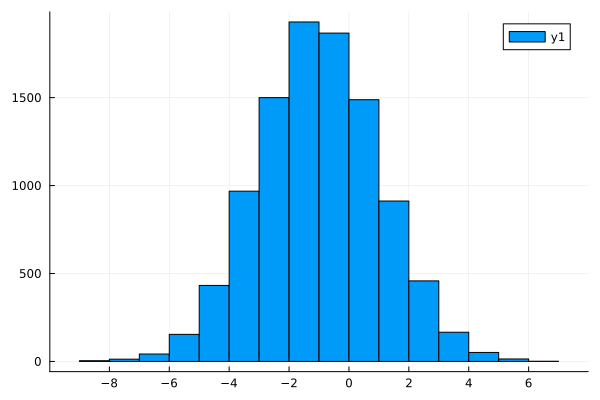

In [85]:
histogram(model,bins = 20)

In [86]:
pdf_gaussian = pdf.(Normal(-1,2),x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

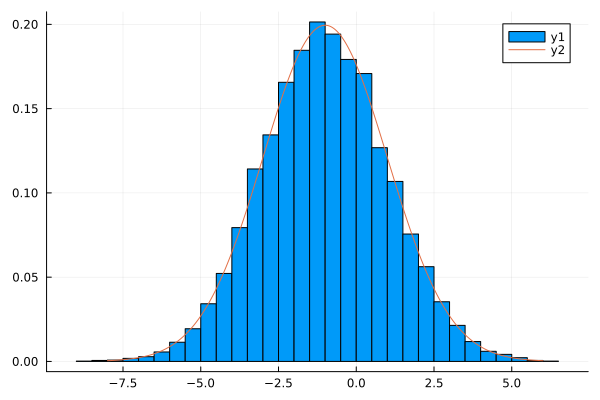

In [88]:
histogram(model, normalize=true)
plot!(x,pdf_gaussian)